## Extract FLASH Data in yt
Mirielle Wong

6/21/24

Use yt's covering_grid class to extract data from FLASH.

In [1]:
# https://yt-project.org/

import yt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [12]:
plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_chk_0005"

In [13]:
ds = yt.load(plot_path)

yt : [INFO     ] 2024-06-26 17:52:01,290 Parameters: current_time              = 2.0028718575168763e-09
yt : [INFO     ] 2024-06-26 17:52:01,290 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-06-26 17:52:01,291 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-06-26 17:52:01,292 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-06-26 17:52:01,293 Parameters: cosmological_simulation   = 0


In [14]:
list(ds.fields.flash)

[On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'magp'): (units: 'code_mass/(code_length*code_time**2)'),
 On-Disk Field ('flash', 'magx'): (units: 'code_magnetic', display_name: 'B_x'),
 On-Disk Field ('flash', 'magy'): (units: 'code_magnetic', display_name: 'B_y'),
 On-Disk Field ('flash', 'sumy'): (units: ''),
 On-Disk Field ('flash', 'targ'): (units: '', display_name: 'Target Material Fraction'),
 On-Disk Field ('flash', 'tele'): (units: 'code_temperature'),
 On-Disk Field ('flash', 'tion'): (units: 'code_temperature'),
 On-Disk Field ('flash', 'trad'): (units: 'code_temperature'),
 On-Disk Field ('flash', 'ye'): (units: '', display_name: 'Y_e'),
 Alias Field for ('index', 'vertex_x') ('flash', 'vertex_x'): (units: 'cm'),
 Alias Field for ('index', 'dy') ('flash', 'dy'): (u

In [5]:
print(ds.domain_dimensions)
domain_left_edge = [-0.6, -0.075, -0.6]    # from info printed in yt.load

[288 272 288]


In [6]:
# this is from the yt documentation

level = 2
dims = ds.domain_dimensions * ds.refine_by**level

# We construct an object that describes the data region and structure we want
# In this case, we want all data up to the maximum "level" of refinement
# across the entire simulation volume.  Higher levels than this will not
# contribute to our covering grid.
all_data = ds.covering_grid(
    level,
    left_edge=domain_left_edge,
    dims=dims,
    # And any fields to preload (this is optional!)
)

In [7]:
# relevant vars

print(ds.units)
print(ds.length_unit)
print(ds.mass_unit)
print(dims)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[1152 1088 1152]
[288 272 288]
2


In [8]:
data_level0 = ds.covering_grid(
    0,
    left_edge=domain_left_edge,
    dims=ds.domain_dimensions
)

In [9]:
# check shape
print(data_level0['flash', 'tele'][:, :, 0].shape)
print(data_level0['index', 'cell_volume'].shape)

(288, 272)
(288, 272, 288)


In [10]:
# we can create a df for any any field in ds.fields.flash
ye = pd.DataFrame(data_level0['flash', 'ye'][:, :, 0]) # why is this taking the zeroth index?
tion = pd.DataFrame(data_level0['flash', 'tion'][:, :, 0])

In [11]:
density = pd.DataFrame(data_level0['flash', 'dens'][:, :, -1])
trad = pd.DataFrame(data_level0['flash', 'trad'][:, :, -1])

cell_volume = pd.DataFrame(data_level0['index', 'cell_volume'][:,:,-1])
density.head

<bound method NDFrame.head of        0      1      2      3      4      5      6      7      8      9    \
0    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
1    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
2    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
3    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
4    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
283  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
284  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
285  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
286  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
287  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   

     ...       262       263       264       

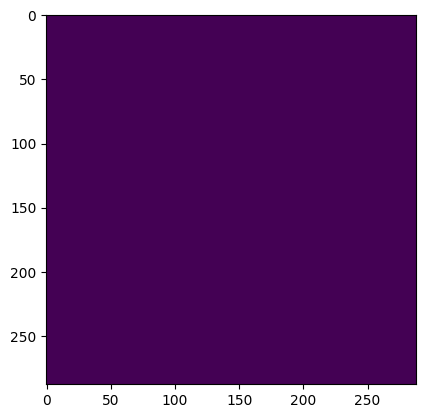

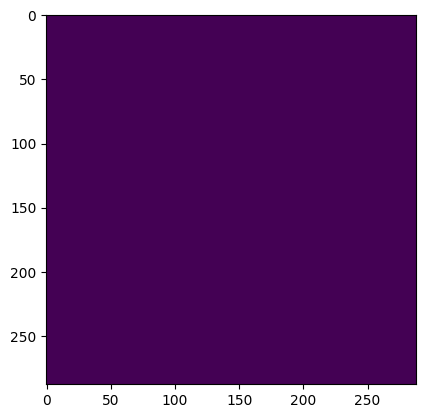

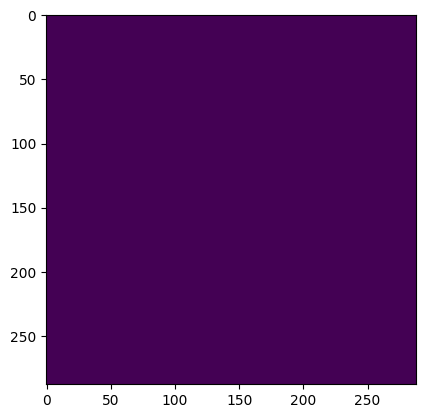

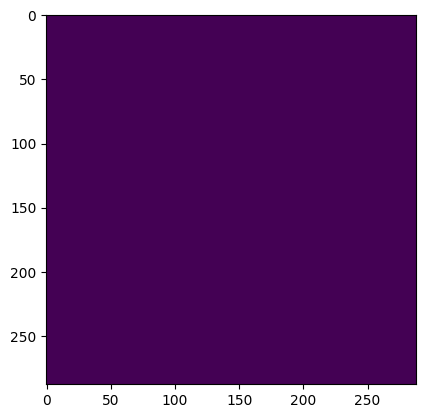

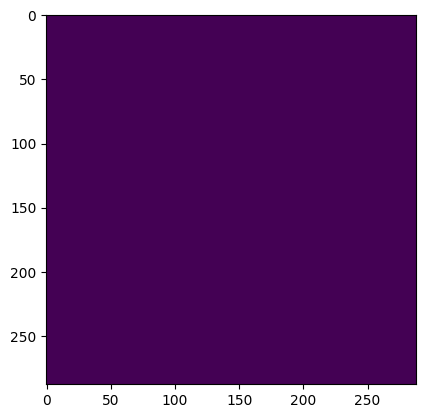

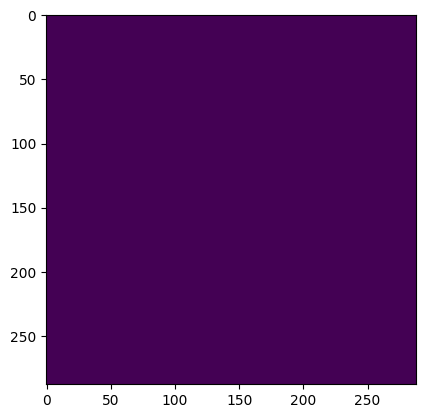

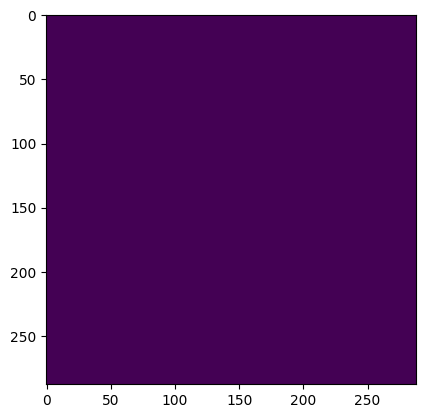

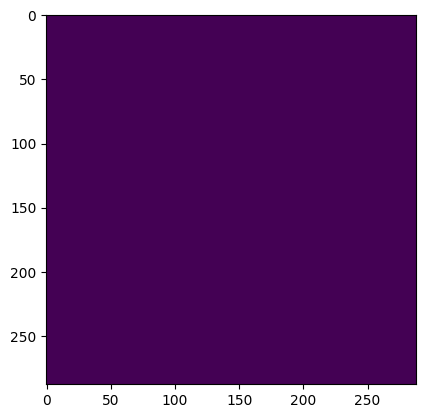

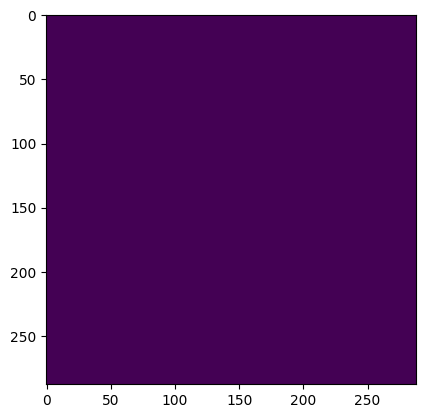

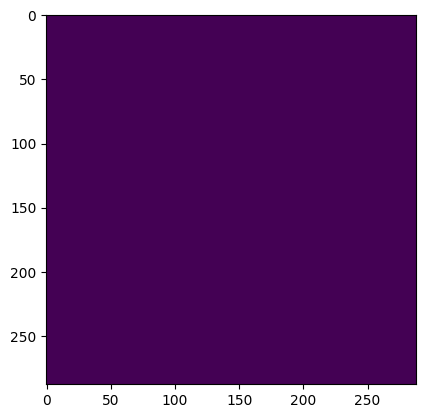

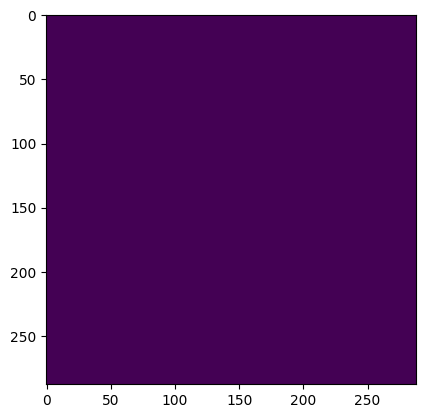

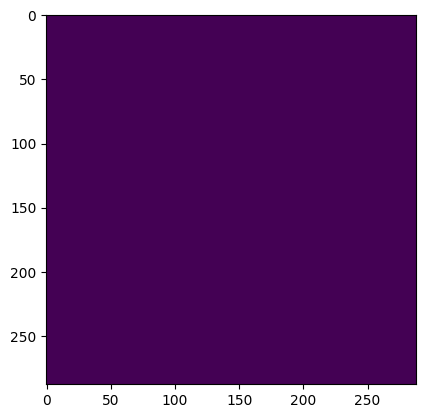

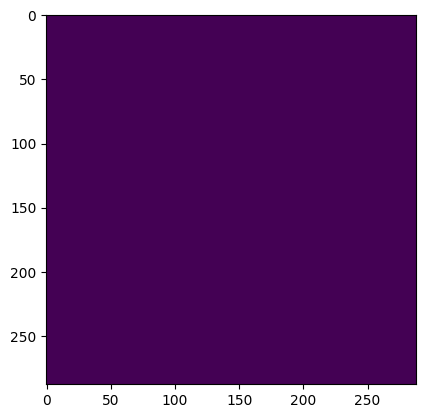

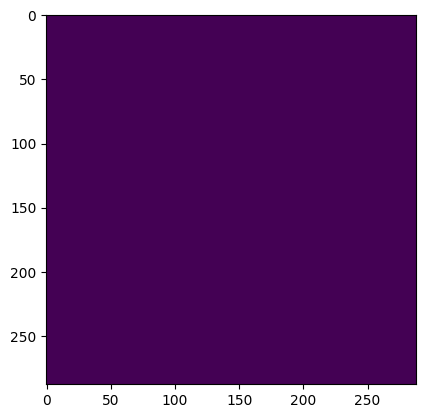

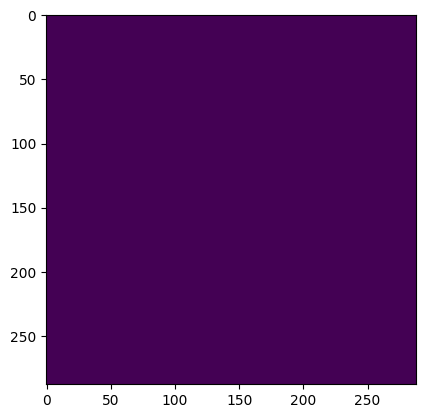

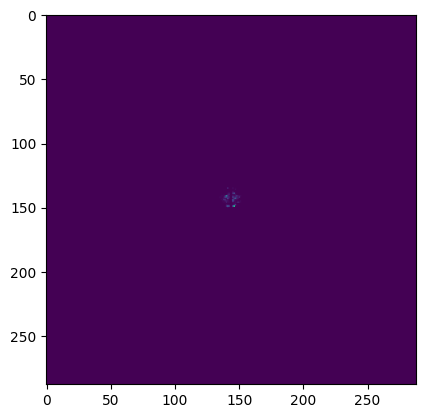

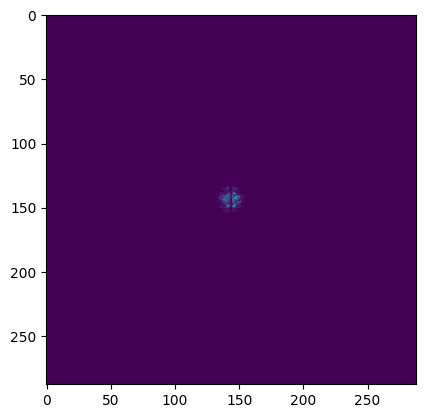

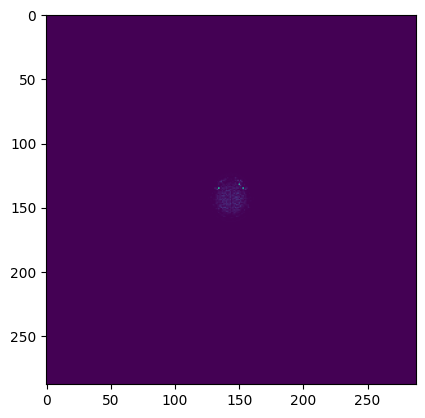

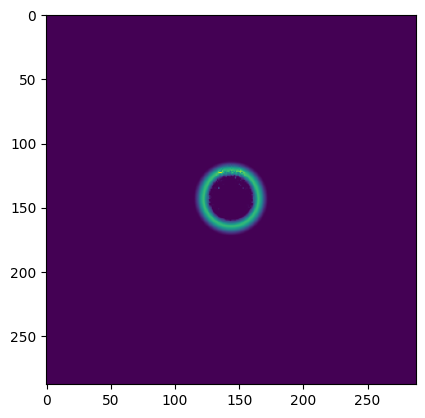

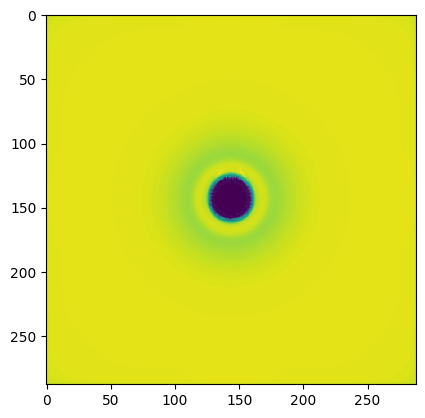

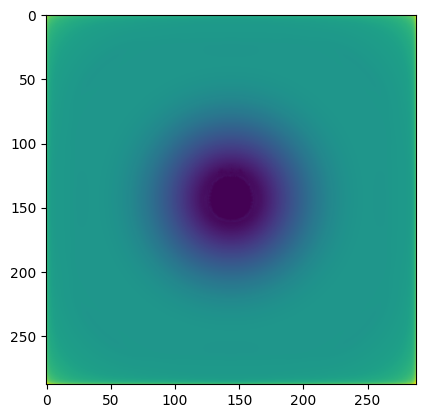

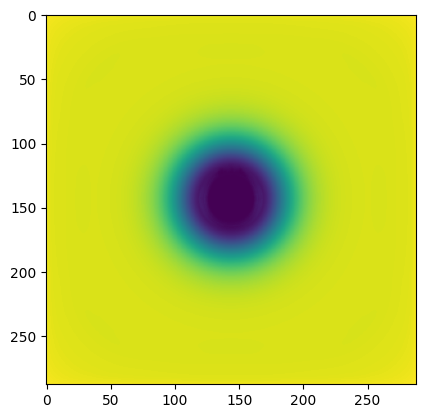

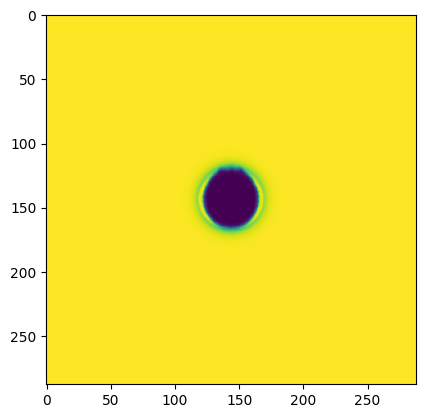

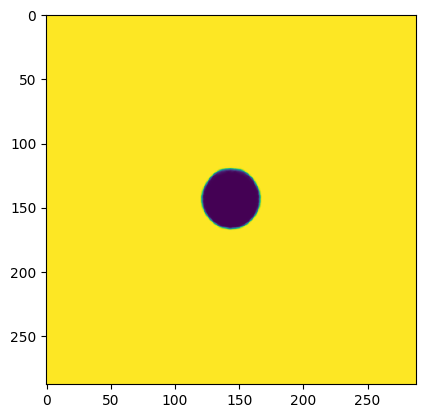

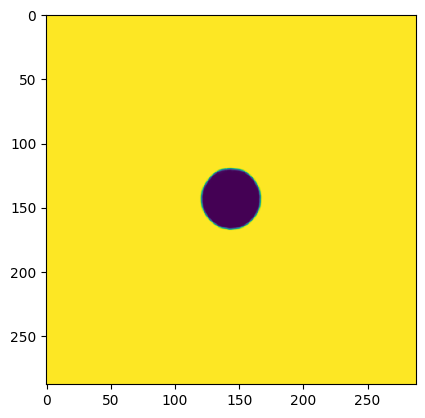

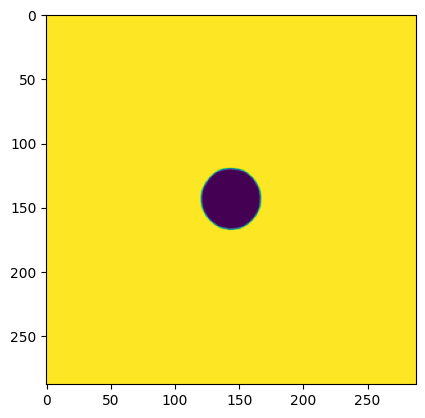

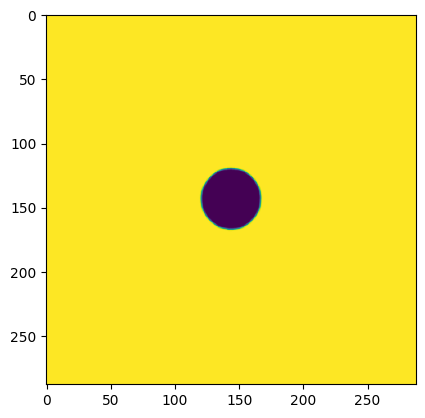

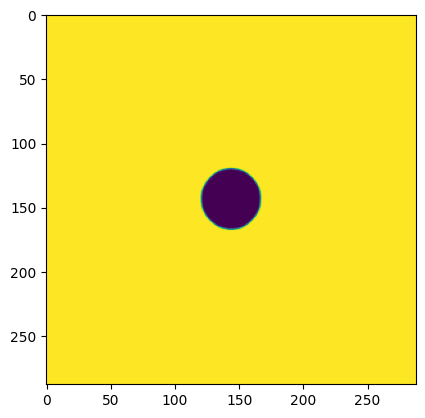

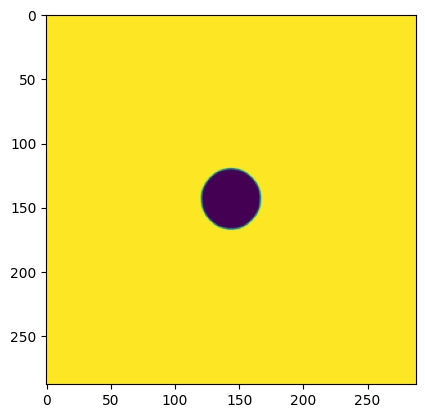

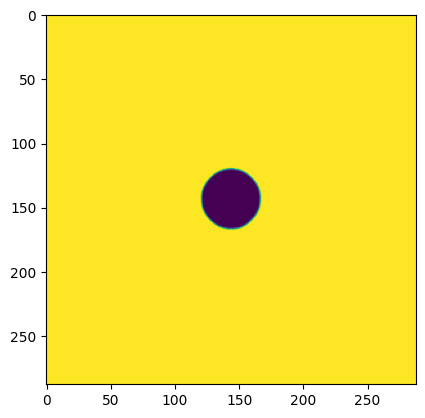

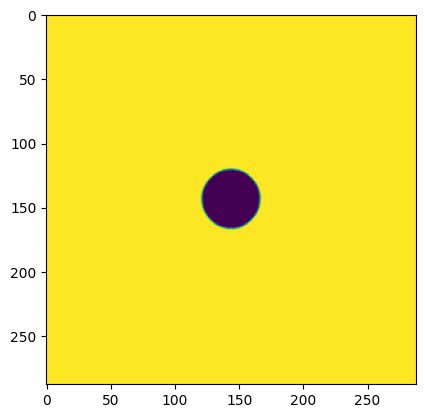

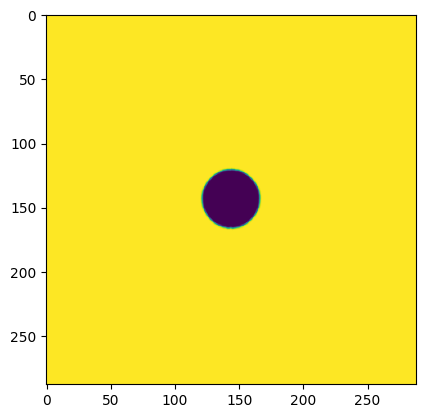

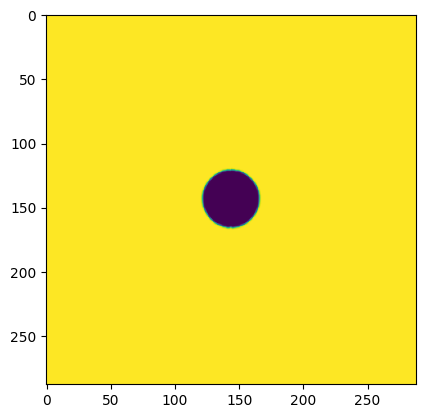

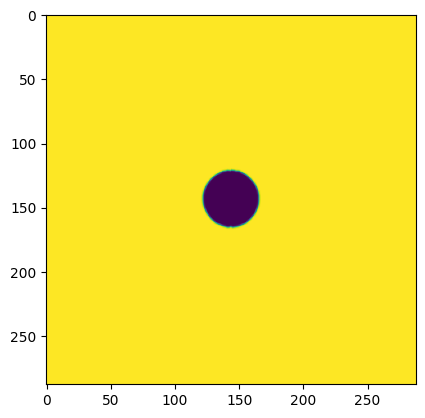

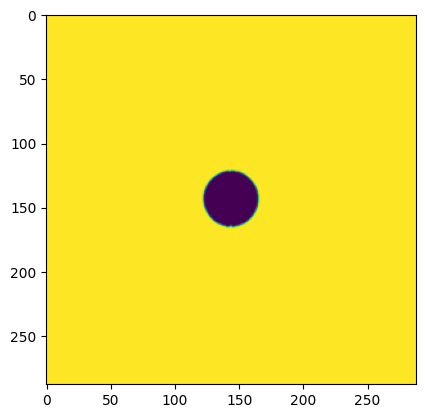

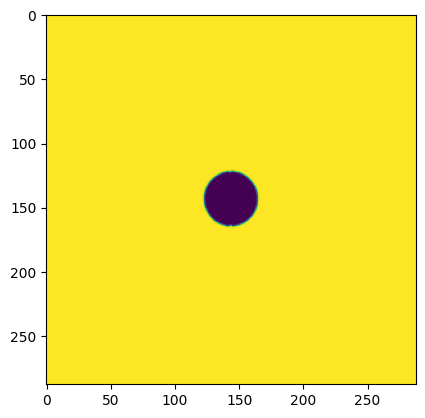

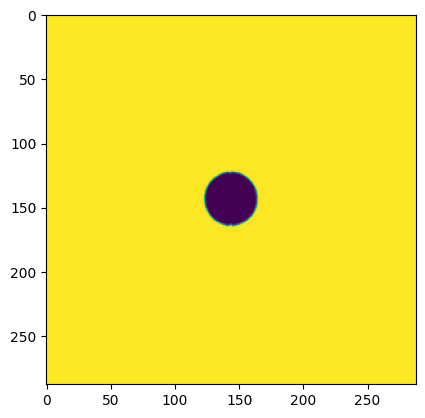

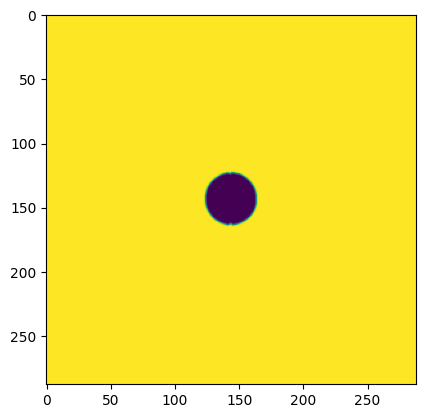

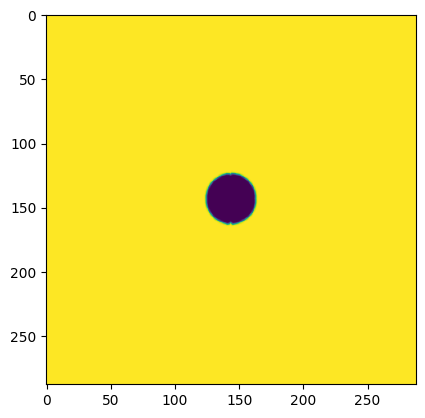

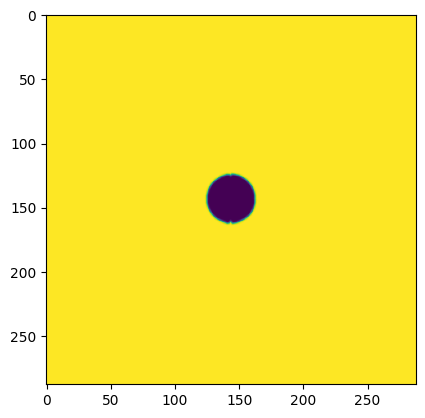

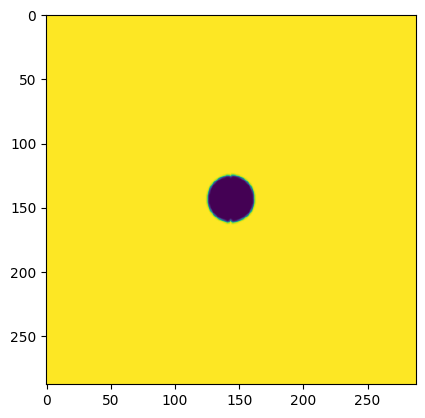

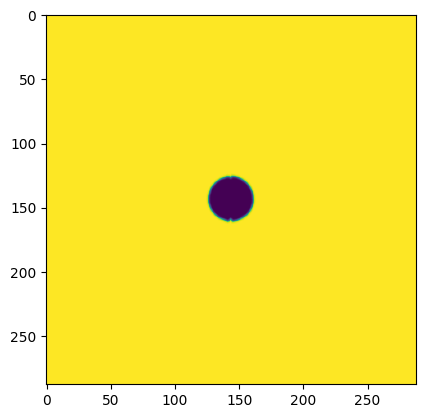

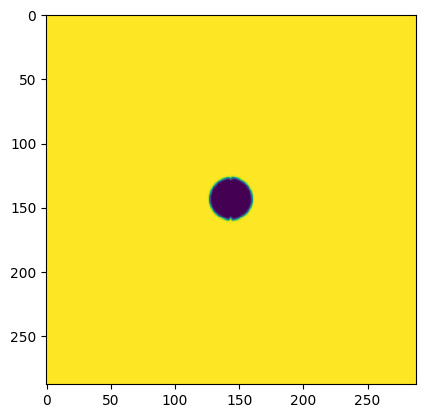

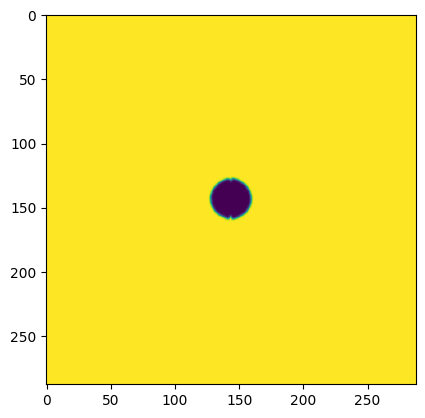

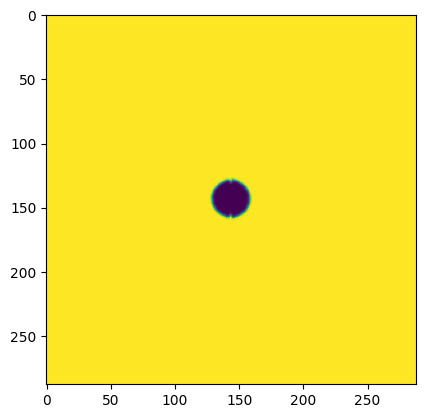

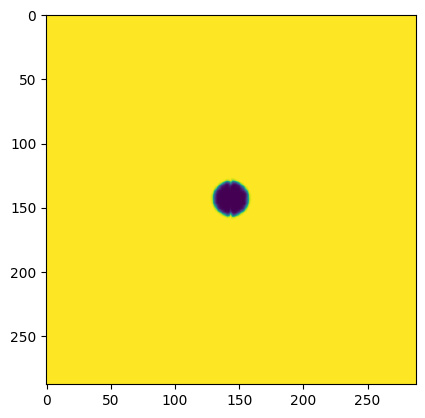

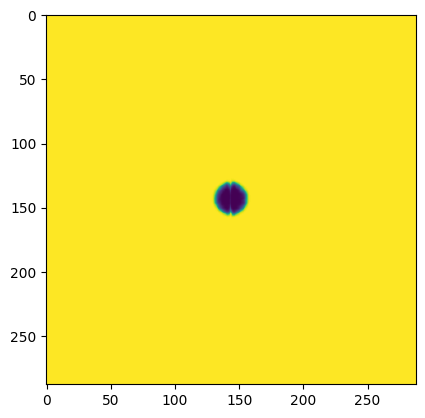

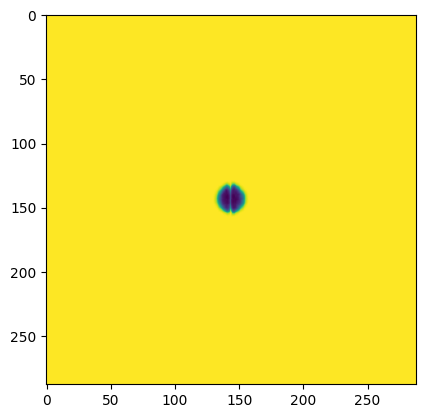

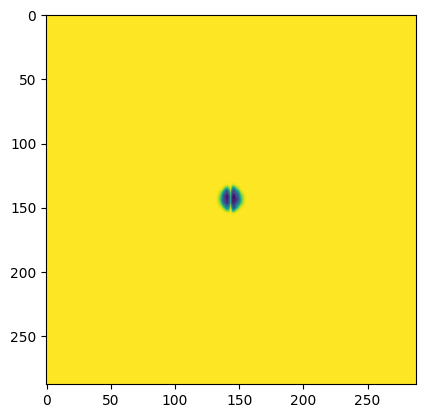

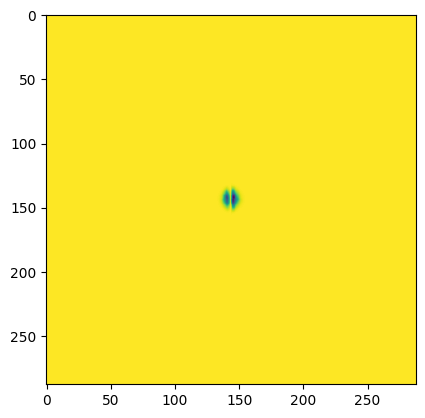

In [52]:

for i in range(0,50,1):
    plt.imshow(data_level0['flash', 'cham'][:, i, :])
    plt.show()

In [33]:
density.to_csv("dens_grid.csv", index=False)

In [14]:
density.to_hdf("dens_grid.h5", key='density')